### Przygotowanie środowiska programistycznego

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

from termcolor import colored

### Wczytanie danych

Poniższa komórka wczytuje i wstępnie przetwarza dane.

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQZFuVJB21qqms2KeE1kIAKdE6xtHLlyq00khl24IOdFWncOVoyurppSxcrbSRebFhn-QdAlGzzUjMJ/pub?gid=1842745960&single=true&output=csv"

df = pd.read_csv(url, sep=",",parse_dates=[0])
df = df.rename(columns={' ' : "Data"})
df = df.fillna(0)
df.describe()

,Armii Krajowej,Bora-Komorowskiego,Bulwary,Grzegórzecka,Kamieńskiego,Klimeckiego,Kopernika,Kotlarska,Mogilska,Monte Cassino,...,Smoleńsk,Tyniecka,Wadowicka,Wielicka,Średnia temp.,Min. temp.,Maks. temp.,Odczuwalna temp.,Opady (mm),Wiatr
count,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,...,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,225.358025,552.700960,1560.050297,475.310471,245.607682,801.543210,1328.685871,1582.722451,2016.113397,1179.466392,...,561.839049,1152.555098,834.720165,906.176955,9.897348,5.984454,13.790581,8.460448,1.782396,10.927298
std,436.592723,573.898407,1287.927869,801.522689,474.846343,824.064314,1250.413194,1156.375820,1380.121524,1031.872796,...,407.247080,1314.490292,626.779461,672.754362,8.221521,7.175345,9.491318,9.694117,4.829048,5.493548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000,...,0.000000,0.000000,1.000000,14.000000,-16.000000,-18.000000,-15.000000,-22.000000,0.000000,0.000000
25%,0.000000,0.000000,439.500000,0.000000,0.000000,0.000000,0.000000,601.500000,829.000000,305.500000,...,236.000000,181.000000,314.000000,321.000000,3.500000,1.000000,6.000000,0.000000,0.000000,7.000000
50%,0.000000,354.000000,1186.000000,0.000000,0.000000,531.000000,1060.000000,1304.000000,1724.000000,894.000000,...,525.000000,599.000000,684.000000,771.000000,10.000000,6.000000,14.000000,9.000000,0.000000,10.000000
75%,216.500000,945.000000,2526.500000,803.500000,233.000000,1339.500000,2181.000000,2392.000000,3005.000000,1944.500000,...,871.500000,1871.000000,1214.000000,1353.000000,16.500000,12.000000,22.000000,17.000000,1.100000,14.000000
max,2042.000000,2335.000000,7075.000000,3182.000000,2084.000000,3418.000000,4572.000000,6142.000000,5436.000000,4025.000000,...,1584.000000,8824.000000,3549.000000,2892.000000,28.500000,21.000000,39.000000,30.000000,63.000000,41.000000


# Zadanie 1

### Analiza wizualna danych

**Proszę:**

* wypisać na ekran nazwy kolumn znajdujące się w zbiorze danych
* narysować na odzielnych rysunkach wykresy liczby rowerzystów w funkcji daty dla ulic **Wielickiej** i **Kopernika**
* narysować dwuwymiarowy wykres liczby rowerzystów na ulicach **Wielickiej (oś X)** i **Kopernika (oś Y)**
* znaleźć dzień kiedy ulicą **Kopernika** przechało najwięcej rowerzystów. Proszę wypisać na ekran  znalezioną datę oraz liczbę rowerzytstów.

In [3]:
print(df.columns)   # nazwy kolumn

dates = df['Data']
wiel = df['Wielicka']
kop = df["Kopernika"]



# print(colored("Dnia:","blue"),date, colored("ulicą Kopernika przejechało","blue"),value,colored("rowerzystów.","blue"))

Index(['Data', 'Armii Krajowej', 'Bora-Komorowskiego', 'Bulwary', 'Dworzec',
       'Grzegórzecka', 'Kamieńskiego', 'Klimeckiego', 'Kopernika', 'Kotlarska',
       'Mogilska', 'Monte Cassino', 'Niepołomska', 'Nowohucka', 'Smoleńsk',
       'Tyniecka', 'Wadowicka', 'Wielicka', 'Średnia temp.', 'Min. temp.',
       'Maks. temp.', 'Odczuwalna temp.', 'Opady (mm)', 'Wiatr'],
      dtype='object')


# Wielicka

Text(0.5, 1.0, 'Wielicka')

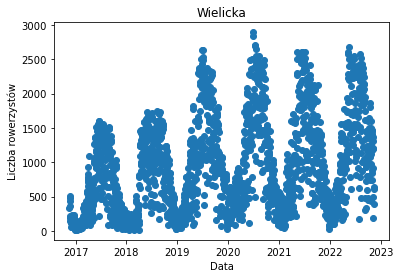

In [4]:
plt.scatter(dates, wiel)
plt.xlabel("Data")
plt.ylabel("Liczba rowerzystów")
plt.title("Wielicka")

# Kopernika

Text(0.5, 1.0, 'Kopernika')

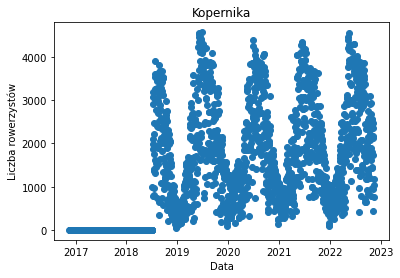

In [5]:
plt.scatter(dates, kop)
plt.xlabel("Data")
plt.ylabel("Liczba rowerzystów")
plt.title("Kopernika")

# Wykres obu

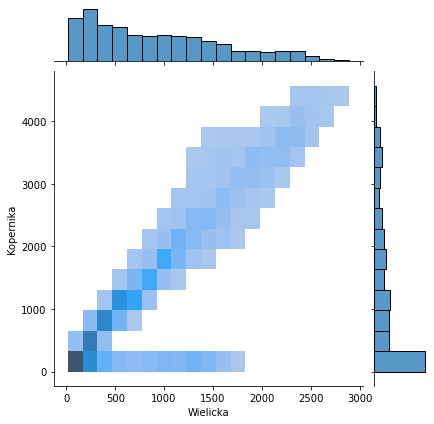

In [6]:
# wszysktie
sns.jointplot(data=df, x="Wielicka", y="Kopernika", kind='hist')

# Maksymalna liczba rowerzystów Kopernika

# Zadanie 2

Modelowanie liczby rowerzystów z użyciem regresji liniowej.

**Wejście:** liczba rowerzystów na "innych ulicach"

**Wyjście:** liczba rowerzystów na wybranej ulicy

**Proszę:**

* wydzielić zbiór treningowy ```df_train```: zliczenia dla okresu od **2019.01.01** do **2019.12.31**
* wydzielić zbiór testowy, ```df_test```: zliczenia dla okresu od **2020.01.01** do **2022.10.31**

In [7]:
df_train = df[df['Data'] > '2019-01-01']
df_train = df_train[df_train['Data'] < '2019-12-31']

df_test = df[df['Data'] > '2020-01-01']
df_test = df_test[df_test['Data'] < '2020-10-31']

print(df_train)
print(df_test)

           Data  Armii Krajowej  Bora-Komorowskiego  Bulwary Dworzec  \
775  2019-01-02             0.0               103.0      202     264   
776  2019-01-03             0.0               106.0      277     286   
777  2019-01-04             0.0               119.0      229     273   
778  2019-01-05             0.0                22.0       36      59   
779  2019-01-06             0.0                41.0       37      42   
...         ...             ...                 ...      ...     ...   
1133 2019-12-26             0.0                65.0      143      98   
1134 2019-12-27             0.0               130.0      196     233   
1135 2019-12-28             0.0                71.0      147     147   
1136 2019-12-29             0.0                66.0      165     143   
1137 2019-12-30             0.0               192.0      415     374   

      Grzegórzecka  Kamieńskiego  Klimeckiego  Kopernika  Kotlarska  ...  \
775            0.0           0.0        204.0      443.0   

**Proszę:**

* znaleźć parametry regresji liniowej z użyciem algorytmu zbiorczego, dla modelu który przewiduje liczbę rowerzystów na ulicy **Wielickiej** na podstawie zliczeń na ulicach:

```Python
    ['Bora-Komorowskiego',
     'Klimeckiego', 'Kopernika', 'Kotlarska',
     'Mogilska', 'Monte Cassino', 'Nowohucka', 'Smoleńsk',
     'Tyniecka', 'Wadowicka'] 
```

* zliczenia rowerzystów wchodzące do modelu proszę znormalizować do jedynki: ```x/x.max()```
* wypisać na ekran średnią i odchylenie standardowe względnej różnicy rzeczywistej i obliczonej liczby rowerzystów: ```(y-y_pred)/y``` dla zbiorów testowego
  i treningowego

In [8]:
%%time

# Trening

y = df_train["Wielicka"]
x = df_train[['Bora-Komorowskiego',
     'Klimeckiego', 'Kopernika', 'Kotlarska',
     'Mogilska', 'Monte Cassino', 'Nowohucka', 'Smoleńsk',
     'Tyniecka', 'Wadowicka']]

x = x/x.max()

def iterative_batch_gradient(x, y, init_theta, alpha, nIter):
    
    # print(len(x.columns))
    # x_expanded = np.column_stack((np.ones(x.shape[0]), x))

    x = np.array(x)
    theta = init_theta
    theta_est = np.copy(theta)
    theta_est = np.reshape(theta_est, (-1, 10))
    # theta_est = np.reshape(theta_est, (-1, 2))

    batchSize = len(x)
    for iteration in range(nIter):
        delta = np.sum(theta*x, axis=1)-y
        delta = np.array(delta)
        delta = np.reshape(delta, (batchSize, 1))
        bracket = np.mean(delta * x, axis=0)
        theta  = theta - alpha * bracket

        theta_est = np.append(theta_est, theta.reshape((1, 10)), axis=0)
        # theta_est = np.append(theta_est, theta.reshape((5, 2)), axis=0)   bezposrednio z przykladu na zajeciach dzialajace

    return theta_est   

nTheta = 10
theta = np.zeros(nTheta)
theta_est = iterative_batch_gradient(x, y, init_theta=theta, alpha=0.01, nIter=11)    
print(theta_est[-1])
y_pred_train = np.sum(theta_est[-1]*x, axis=1)
std = (y-y_pred_train)/y
std = np.std(std)

print("Średnia", y_pred_train.mean(), "std", str(std))

y_test = df_test["Wielicka"]
x_test = df_test[['Bora-Komorowskiego',
     'Klimeckiego', 'Kopernika', 'Kotlarska',
     'Mogilska', 'Monte Cassino', 'Nowohucka', 'Smoleńsk',
     'Tyniecka', 'Wadowicka']]

x_test = x_test/x_test.max()
theta_est_test = iterative_batch_gradient(x_test, y_test, init_theta=theta, alpha=0.01, nIter=11)
print(theta_est_test[-1])

y_pred_test = np.sum(theta_est_test[-1]*x_test, axis=1)
std_test = (y_test-y_pred_test)/y_test
std_test = np.std(std_test)

print("Średnia", y_pred_test.mean(), "std", str(std_test))

[42.58050613 53.13471049 57.5233533  57.49213133 59.16630638 56.89368057
 52.61385538 60.7456656  28.77686131 42.32463505]
Średnia 189.60415443468744 std 0.02818446720920079
[64.53632474 57.26740235 66.64394203 65.09530864 67.11771336 66.4698489
 60.99539818 72.78067708 38.33097932 42.79632252]
Średnia 235.0052592305401 std 0.02117599466875861
CPU times: total: 0 ns
Wall time: 19.1 ms


# Zadanie 3

Modelowane klasyfikacji zimno/ciepło na podstawie zliczeń rowerzystów. 

**Proszę:**

* do danych testowych dodać do danych kolumnę "Zimno" zawierającą informację czy było zimno: **Odczuwalna temp.<10 stopni**
* użyć modelu regresji logistycznej do modelowania wartości kolumny "Zimno". Jako dane wejściowe proszę podać listę ulic z zadania 2 z normalizacją liczby rowerzystów do jedynki: **x/x.max()**
* jako parametrów modelu proszę użyć następujących wartości:
```Python
[3.48358238, -2.01857476, -1.52305565, -0.29609745, -0.45887462, -0.39171707, -1.77006993, -2.43057184,  0.06524249, -3.50162108,  0.06548802]
```
* stworzyć macierz ```y_pred``` zawierającą odpowiedź modelu na pytanie "Czy było zimno?"
* używając macierzy ```y_pred``` oraz prawdziwych wartości kolumny "Zimno"
odpowiedzieć na pytania: 
    * **Jaki jest ułamek poprawnych odpowiedzi modelu?**
    * **Jaki ułamek zimnych dni został poprawnie oznaczony jako zimny?** 
    

**Wskazówka**: Proszę zignorować ewentualny komunikat typu 
```
/tmp/ipykernel_235/2082985459.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead
```

In [9]:
import scipy.optimize as so

df_test["Zimno"] = df_test["Odczuwalna temp."] < 10

y = df_test["Wielicka"]
x = df_test[['Bora-Komorowskiego',
     'Klimeckiego', 'Kopernika', 'Kotlarska',
     'Mogilska', 'Monte Cassino', 'Nowohucka', 'Smoleńsk',
     'Tyniecka', 'Wadowicka']]

x = x/x.max()
theta = np.array([3.48358238, -2.01857476, -1.52305565, -0.29609745, -0.45887462, 
               -0.39171707, -1.77006993, -2.43057184,  0.06524249, -3.50162108,  0.06548802])

def logistic_func(theta, x):
    # dodaj kolumne jedynek
    x_expanded = np.column_stack((np.ones(x.shape[0]), x))
    # policz argument funkcji
    arg = np.sum(theta*x_expanded, axis=1)
    # uzyj np.where żeby ograniczyc wartosci parmetru do [-18,18]
#     arg = np.where(np.abs(arg) > 18, 18*np.sign(arg), arg)
    return 1.0/(1+np.exp(-arg))

def log_likelihood(theta, x, y, model):
    # x_expanded = np.column_stack((np.ones(x.shape[0]), x))
    tosum = y*np.log(model(theta, x))+(1-y)*np.log(1-model(theta, x))
    result = np.sum(tosum, axis=0)

    return result

def negative_log_likelihood(theta, x, y, model):
    return -log_likelihood(theta, x, y, model)


def log_likelihood_derivative(theta, x, y, model):
    # odpowiedź modelu na dane
    # różnica odpowiedzi modelu i wartości prawdziwej
    x_expanded = np.column_stack((np.ones(x.shape[0]), x))
    # print(x_expanded)
    # obliczenie pochodnej wysumowanej po wszyskich przykładach

    delta = y - model(theta, x)
    delta = np.array(delta)
    delta = np.column_stack((delta, delta, delta, delta, delta, delta, delta, delta, delta, delta, delta))
    tosum = delta*x_expanded    # tu jest problem
    # print(tosum)
    result = np.sum(tosum, axis=0)
    #sprawdzenie poprawności rozmiaru wyniku
    assert result.shape == theta.shape
    return result

def negative_log_likelihood_derivative(theta, x, y, model):
    return -log_likelihood_derivative(theta, x, y, model)

def classification(theta, x, model):
    model_result = model(theta, x)
    return model_result>0.5


model = logistic_func
y_pred = classification(theta, x, logistic_func)
y_real = df_test['Zimno']

# print(k)

# print(colored("Model udzielił poprawnej odpowiedzi w","blue"),"{:0.2f}%".format(accuracy*100),colored("przykładów.","blue"))
# print(colored("Model udzielił poprawnie oznaczył","blue"),"{:0.2f}%".format(tpr*100),colored("zimnych dni jako zimne.","blue"))